TEAM MEMBERS: BILL KISUYA, JOAN NJOROGE, BRENDA MUTAI, BRIAN NGENY, JEFF KIARIE & IVAN KIBET.

# 1.Introduction

Vehicle accidents are a major source of worry for public safety and transportation agencies. They not only cause death and property damage, but also interrupt traffic flow and incur economic losses. Understanding the factors that contribute to these collisions and their effects is critical for putting effective measures in place to decrease their occurrence and impact.

The City of Chicago has collected extensive crash data through its electronic crash reporting system (E-Crash), providing a valuable resource to analyse and gain insights into the factors contributing to accidents. The dataset comprises a wide range of crash parameters, including crash circumstances, vehicles involved, and people affected.

The goal of this study is to analyse the dataset and provide a full understanding of car crashes and their characteristics in the city of Chicago. We hope to discover key factors that contribute to collisions, measure the impact they have, and analyse the circumstances surrounding the accidents by studying the numerous characteristics associated with each crash event.

This project's target audience includes numerous road safety stakeholders such as transportation authorities, law enforcement agencies, policymakers, and insurance companies. Decision-makers can establish focused plans and activities to reduce the frequency and severity of accidents by knowing the fundamental elements that contribute to collisions.

# 2. Business Understanding

The city of Chicago maintains an electronic crash reporting system (E-Crash) which shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD). Data from the CPD's electronic crash reporting system (E-Crash) are displayed without any identifying information. When a crash report is completed or when an existing report in E-Crash receives updates, records are added to the data portal. The drivers involved in most minor incidents self-report about half of all crash reports to the police station, while the other half are documented on the scene by the responding police officer. The reporting officer records several crash parameters, such as information on street conditions, weather, and posted speed restrictions, based on the best information at the moment, but many of these may conflict with posted data or other assessments of road conditions.

The dataset offers useful information for evaluating traffic incidents, spotting patterns, and putting safety measures in place to lower casualties and improve road safety. This information can be used by researchers, decision-makers, and analysts to make more informed choices and enhance overall road transportation systems. The goal of this research is to create a categorization model that will aid in determining the characteristics of an automobile collision that are significant.

# 3.Problem statement

Traffic accidents occur due to various factors, including vehicle characteristics, driver behavior, road conditions, weather, and traffic patterns. The Vehicle Safety Board and the City of Chicago who are the stakeholder recognize the importance of identifying and understanding the various factors leading to the accidents in order to implement targeted safety interventions and improve overall road safety.
From the several factors our primary objective that we aim to achieve are:
 
* To develop a model that can accurately determine the primary cause of car accidents by utilizing data, on vehicles, individuals and road conditions
*  To recommend to the City of Chicago Department of Transportation proactive measures to mitigate the risks, injuries and enhance overall road safety.

# 4.Data Understanding

We will make use of datasets from the Chicago Data Portal, an open data resource where one may find relevant information about the city. In particular we will be focusing on three datasets:
1. Traffic Crashes - Vehicles
2. Traffic Crashes - People 
3. Traffic Crashes - Crashes. 

The full description of the columns can be found in the data_description.md file.

Insights:
Drivers are more prone to be affected with the accidents with 731 cases.
Most victims are Males.
The most affected age group is between 26-30.

# 5.Data Cleaning

In [23]:
# Import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Set display options for pandas
pd.set_option('display.max_columns', None)
# Load data from CSV files into dataframes
crash = pd.read_csv('https://data.cityofchicago.org/resource/85ca-t3if.csv')
vehicle = pd.read_csv('https://data.cityofchicago.org/resource/68nd-jvt3.csv')
person = pd.read_csv('https://data.cityofchicago.org/resource/u6pd-qa9d.csv')

In [25]:
#(feature engineering)
# merging all three databases into 1, observing shape and previewing data 
merged = pd.merge(left=crash, right = vehicle, left_on='crash_record_id', right_on="crash_record_id")
df = pd.merge(left=merged, right=person, left_on = 'vehicle_id', right_on='vehicle_id')
# Display the shape and a preview of the merged dataframe
print(df.shape)
df.head()

(1700, 149)


,crash_record_id_x,rd_no_x,crash_date_est_i,crash_date_x,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,private_property_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,crash_unit_id,rd_no_y,crash_date_y,unit_no,unit_type,num_passengers,vehicle_id,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,crash_record_id_y,rd_no,crash_date,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result_value,cell_phone_use
0,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,NaN,NaN,2023-08-07T22:00:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,3352,W,LAWRENCE AVE,1713,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,8,41.968513,-87.713051,POINT (-87.713051267198 41.968512941476),1634628,NaN,2023-08-07T22:00:00.000,1,DRIVER,NaN,1555514.0,NaN,VOLKSWAGEN,OTHER (EXPLAIN IN NARRATIVE),NaN,NaN,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,W,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,Y,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O1634628,DRIVER,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,NaN,2023-08-07T22:00:00.000,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,NaN,NaN,2023-08-07T22:00:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,3352,W,LAWRENCE AVE,1713,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,8,41.968513,-87.713051,POINT (-87.713051267198 41.968512941476),1634629,NaN,2023-08-07T22:00:00.000,2,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O1634

In [26]:
# dropping redundant columns, previewing shape, data and info 
drop = ['crash_record_id_x', 'crash_date_x', 'alignment', 'intersection_related_i', 'sec_contributory_cause',
        'num_units','crash_unit_id', 'vehicle_id', 'person_id', "crash_record_id_y", 'street_no', 'street_direction',
       'street_name', 'location', 'zipcode', 'crash_month', 'latitude', 'longitude', 'crash_date_y', 'unit_no',
       'model', 'vehicle_year', 'vehicle_use', 'travel_direction', 'maneuver', 'occupant_cnt', 'first_contact_point',
       'lic_plate_state', 'city']
cleaned_df = df.drop(columns=drop)
print(cleaned_df.shape)
display(cleaned_df.head())
cleaned_df.info()

(1700, 120)


,rd_no_x,crash_date_est_i,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,roadway_surface_cond,road_defect,report_type,crash_type,private_property_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,rd_no_y,unit_type,num_passengers,cmrc_veh_i,make,vehicle_defect,vehicle_type,towed_i,fire_i,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_type,rd_no,crash_date,seat_no,state,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result_value,cell_phone_use
0,NaN,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,NaN,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NaN,NaN,NaN,NaN,NaN,NaN,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,NaN,DRIVER,NaN,NaN,VOLKSWAGEN,UNKNOWN,UNKNOWN/NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DRIVER,NaN,2023-08-07T22:00:00.000,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,NaN,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,NaN,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NaN,NaN,NaN,NaN,NaN,NaN,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,NaN,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PEDESTRIAN,NaN,2023-08-07T22:00:00.000,NaN,IL,M,30.0,NaN,NaN,NaN,NaN,NaN,NONINCAPACITATING INJURY,SWEDISH COVENANT,CFD,NaN,NONE,NaN,REMOVED BY EMS,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,NaN,NaN
2,NaN,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,NaN,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NaN,NaN,NaN,NaN,NaN,NaN,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,NaN,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PEDESTRIAN,NaN,2023-08-07T18:25:00.000,NaN,IL,M,67.0,NaN,NaN,NONE PRESENT,NaN,NaN,NONINCAPACITATING INJURY,NaN,NaN,NaN,NONE,UNKNOWN,NORMAL,STANDING IN ROADWAY,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED,NaN,NaN
3,NaN,NaN,30,TRAFFIC SIGNAL,FUNCTI

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 120 entries, rd_no_x to cell_phone_use
dtypes: float64(30), int64(11), object(79)
memory usage: 1.6+ MB


In [27]:
# calculating nulls percentage
nulls = cleaned_df.isna().sum()
# Calculate the percentage of null values for columns with missing data
null_percent = nulls[nulls>0] / len(df)
# extracting columns with excesssive nulls which is set at 95%
Index_label = null_percent[null_percent>.70].index.tolist()
Index_label[:7]


['rd_no_x',
 'crash_date_est_i',
 'lane_cnt',
 'private_property_i',
 'photos_taken_i',
 'statements_taken_i',
 'dooring_i']

In [28]:
# previewing shape, data and info 
cleaned_df2 = cleaned_df.drop(columns = Index_label)
print(cleaned_df2.shape)
display(cleaned_df2.head())
cleaned_df2.info()

(1700, 47)


,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,report_type,crash_type,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,beat_of_occurrence,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,unit_type,make,vehicle_defect,vehicle_type,person_type,crash_date,state,sex,age,drivers_license_state,safety_equipment,airbag_deployed,ejection,injury_classification,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result
0,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,DRIVER,VOLKSWAGEN,UNKNOWN,UNKNOWN/NA,DRIVER,2023-08-07T22:00:00.000,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,PEDESTRIAN,2023-08-07T22:00:00.000,IL,M,30.0,NaN,NaN,NaN,NaN,NONINCAPACITATING INJURY,NONE,NaN,REMOVED BY EMS,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
2,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,PEDESTRIAN,2023-08-07T18:25:00.000,IL,M,67.0,NaN,NONE PRESENT,NaN,NaN,NONINCAPACITATING INJURY,NONE,UNKNOWN,NORMAL,STANDING IN ROADWAY,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,BICYCLE,2023-08-07T17:38:00.000,IL,M,41.0,NaN,HELMET NOT USED,NaN,NONE,NONINCAPACITATING INJURY,FAILED TO YIELD,NOT OBSCURED,NORMAL,OTHER ACTION,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,1713,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,BICYCLE,2023-08-07T16:50:00.000,IL,F,19.0,NaN,HELMET NOT USED,NaN,NONE,NONINCAPACITATING INJURY,NONE,NOT OBSCURED,NORMAL,WITH TRAFFIC,NO CONTRASTING CLOTHING,IN CROSSWALK,TEST NOT OFFERED


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posted_speed_limit             1700 non-null   int64  
 1   traffic_control_device         1700 non-null   object 
 2   device_condition               1700 non-null   object 
 3   weather_condition              1700 non-null   object 
 4   lighting_condition             1700 non-null   object 
 5   first_crash_type               1700 non-null   object 
 6   trafficway_type                1700 non-null   object 
 7   roadway_surface_cond           1700 non-null   object 
 8   road_defect                    1700 non-null   object 
 9   report_type                    1676 non-null   object 
 10  crash_type                     1700 non-null   object 
 11  hit_and_run_i                  682 non-null    object 
 12  damage                         1700 non-null   o

In [29]:
# previewing shape, data and info 
df = df.drop(columns = Index_label)
print(df.shape)
# Display the first few rows of the cleaned DataFrame
display(df.head())
# Display information about the DataFrame's columns and non-null counts
df.info()

(1700, 76)


,crash_record_id_x,crash_date_x,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,crash_unit_id,crash_date_y,unit_no,unit_type,vehicle_id,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,occupant_cnt,first_contact_point,person_id,person_type,crash_record_id_y,crash_date,city,state,zipcode,sex,age,drivers_license_state,safety_equipment,airbag_deployed,ejection,injury_classification,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result
0,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,2023-08-07T22:00:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,3352,W,LAWRENCE AVE,1713,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,8,41.968513,-87.713051,POINT (-87.713051267198 41.968512941476),1634628,2023-08-07T22:00:00.000,1,DRIVER,1555514.0,VOLKSWAGEN,OTHER (EXPLAIN IN NARRATIVE),NaN,NaN,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,W,STRAIGHT AHEAD,1.0,FRONT,O1634628,DRIVER,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,2023-08-07T22:00:00.000,NaN,NaN,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED
1,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,2023-08-07T22:00:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,3352,W,LAWRENCE AVE,1713,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,8,41.968513,-87.713051,POINT (-87.713051267198 41.968512941476),1634629,2023-08-07T22:00:00.000,2,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O1634629,PEDESTRIAN,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,2023-08-07T22:00:00.000,CHICAGO,IL,60628.0,M,30.0,NaN,NaN,NaN,NaN,NONINCAPACITATING INJURY,NONE,NaN,REMOVED BY EMS,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
2,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,2023-08-07T22:00:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,3352,W,LAWRENCE AVE,1713,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,8,41.968513,-87.713051,POINT (-87.713051267198 41.968512941476),1634629,2023-08-07T22:00:00.000,2,PEDESTRIAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O1634574,PEDESTRIAN,3024f7e07c9bedf947e1bb87c9169785e7e9fa06ccd3b3...,2023-08-07T18:25:00.000,CHICAGO,IL,60620.0,M,67.0,NaN,NONE PRESENT,NaN,NaN,NONINCAPACITATING INJURY,NONE,UNKNOWN,NORMAL,STANDING IN ROADWAY,NO CONTRASTING CLOTHING,IN ROADWAY,TEST NOT OFFERED
3,eb16c2d8ae341e896cf107c16c60bdb622ba46a98560f6...,2023-08-07T22:00:00.000,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,Y,$500 OR LESS,2023-08-07T22:07:00.000,UNABLE TO DETERMINE,NOT APPLICABLE,3352,W,LAWRENCE AVE,1713,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,0,22,2,8,41.968513,-87.713051,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_record_id_x              1700 non-null   object 
 1   crash_date_x                   1700 non-null   object 
 2   posted_speed_limit             1700 non-null   int64  
 3   traffic_control_device         1700 non-null   object 
 4   device_condition               1700 non-null   object 
 5   weather_condition              1700 non-null   object 
 6   lighting_condition             1700 non-null   object 
 7   first_crash_type               1700 non-null   object 
 8   trafficway_type                1700 non-null   object 
 9   alignment                      1700 non-null   object 
 10  roadway_surface_cond           1700 non-null   object 
 11  road_defect                    1700 non-null   object 
 12  report_type                    1676 non-null   o

### 5.1.Dropping Irrelevant Columns

In [30]:
# dropping following columns due to irrelevance in predicting the cause of car accidents 
# irrelevent columns were dropped due to column description
columns = ['report_type', 'crash_type', 'bac_result', 'date_police_notified',
        'injuries_incapacitating', 'most_severe_injury','injuries_non_incapacitating',
        'injuries_reported_not_evident', 'injuries_no_indication', 'injuries_unknown', 'crash_date',
        'crash_date', 'ejection','beat_of_occurrence']

cleaned_df3 = cleaned_df2.drop(columns = columns)
print(cleaned_df3.shape)
cleaned_df3.head()

(1700, 34)


,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,damage,prim_contributory_cause,injuries_total,injuries_fatal,crash_hour,crash_day_of_week,unit_type,make,vehicle_defect,vehicle_type,person_type,state,sex,age,drivers_license_state,safety_equipment,airbag_deployed,injury_classification,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location
0,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,1,0,22,2,DRIVER,VOLKSWAGEN,UNKNOWN,UNKNOWN/NA,DRIVER,NaN,X,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,PEDESTRIAN,IL,M,30.0,NaN,NaN,NaN,NONINCAPACITATING INJURY,NONE,NaN,REMOVED BY EMS,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY
2,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,PEDESTRIAN,IL,M,67.0,NaN,NONE PRESENT,NaN,NONINCAPACITATING INJURY,NONE,UNKNOWN,NORMAL,STANDING IN ROADWAY,NO CONTRASTING CLOTHING,IN ROADWAY
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,BICYCLE,IL,M,41.0,NaN,HELMET NOT USED,NaN,NONINCAPACITATING INJURY,FAILED TO YIELD,NOT OBSCURED,NORMAL,OTHER ACTION,NO CONTRASTING CLOTHING,IN ROADWAY
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,1,0,22,2,PEDESTRIAN,NaN,NaN,NaN,BICYCLE,IL,F,19.0,NaN,HELMET NOT USED,NaN,NONINCAPACITATING INJURY,NONE,NOT OBSCURED,NORMAL,WITH TRAFFIC,NO CONTRASTING CLOTHING,IN CROSSWALK


In [31]:
cleaned_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   posted_speed_limit       1700 non-null   int64  
 1   traffic_control_device   1700 non-null   object 
 2   device_condition         1700 non-null   object 
 3   weather_condition        1700 non-null   object 
 4   lighting_condition       1700 non-null   object 
 5   first_crash_type         1700 non-null   object 
 6   trafficway_type          1700 non-null   object 
 7   roadway_surface_cond     1700 non-null   object 
 8   road_defect              1700 non-null   object 
 9   hit_and_run_i            682 non-null    object 
 10  damage                   1700 non-null   object 
 11  prim_contributory_cause  1700 non-null   object 
 12  injuries_total           1700 non-null   int64  
 13  injuries_fatal           1700 non-null   int64  
 14  crash_hour              

In [32]:
missing_values = cleaned_df3.isnull().sum()
missing_values

posted_speed_limit            0
traffic_control_device        0
device_condition              0
weather_condition             0
lighting_condition            0
first_crash_type              0
trafficway_type               0
roadway_surface_cond          0
road_defect                   0
hit_and_run_i              1018
damage                        0
prim_contributory_cause       0
injuries_total                0
injuries_fatal                0
crash_hour                    0
crash_day_of_week             0
unit_type                     0
make                        725
vehicle_defect              725
vehicle_type                725
person_type                   0
state                       334
sex                          29
age                         343
drivers_license_state      1160
safety_equipment            203
airbag_deployed             725
injury_classification         0
driver_action               355
driver_vision               471
physical_condition          268
pedpedal

### 5.2.Cleaning categorical data

In [33]:
object_columns = list(cleaned_df3.select_dtypes(include=['object']).columns)
for col in object_columns:
    cleaned_df3[col] = cleaned_df3[col].fillna('missing')

object_columns

['traffic_control_device',
 'device_condition',
 'weather_condition',
 'lighting_condition',
 'first_crash_type',
 'trafficway_type',
 'roadway_surface_cond',
 'road_defect',
 'hit_and_run_i',
 'damage',
 'prim_contributory_cause',
 'unit_type',
 'make',
 'vehicle_defect',
 'vehicle_type',
 'person_type',
 'state',
 'sex',
 'drivers_license_state',
 'safety_equipment',
 'airbag_deployed',
 'injury_classification',
 'driver_action',
 'driver_vision',
 'physical_condition',
 'pedpedal_action',
 'pedpedal_visibility',
 'pedpedal_location']

In [34]:
# objects in the dataset
objects_df = cleaned_df3.select_dtypes(include = object)
objects_df

,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,damage,prim_contributory_cause,unit_type,make,vehicle_defect,vehicle_type,person_type,state,sex,drivers_license_state,safety_equipment,airbag_deployed,injury_classification,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location
0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,DRIVER,VOLKSWAGEN,UNKNOWN,UNKNOWN/NA,DRIVER,missing,X,missing,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,missing,missing,missing
1,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,PEDESTRIAN,missing,missing,missing,PEDESTRIAN,IL,M,missing,missing,missing,NONINCAPACITATING INJURY,NONE,missing,REMOVED BY EMS,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY
2,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,PEDESTRIAN,missing,missing,missing,PEDESTRIAN,IL,M,missing,NONE PRESENT,missing,NONINCAPACITATING INJURY,NONE,UNKNOWN,NORMAL,STANDING IN ROADWAY,NO CONTRASTING CLOTHING,IN ROADWAY
3,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,PEDESTRIAN,missing,missing,missing,BICYCLE,IL,M,missing,HELMET NOT USED,missing,NONINCAPACITATING INJURY,FAILED TO YIELD,NOT OBSCURED,NORMAL,OTHER ACTION,NO CONTRASTING CLOTHING,IN ROADWAY
4,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,PEDESTRIAN,missing,missing,missing,BICYCLE,IL,F,missing,HELMET NOT USED,missing,NONINCAPACITATING INJURY,NONE,NOT OBSCURED,NORMAL,WITH TRAFFIC,NO CONTRASTING CLOTHING,IN CROSSWALK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,WET,NO DEFECTS,missing,"OVER $1,500",WEATHER,DRIVER,HONDA,NONE,VAN/MINI-VAN,PASSENGER,IL,F,missing,SAFETY BELT USED,"DEPLOYED, COMBINATION",NO INDICATION OF INJURY,missing,missing,missing,missing,missing,missing
1696,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR TO FRONT,PARKING LOT,DRY,NO DEFECTS,missing,"$501 - $1,500",IMPROPER BACKING,DRIVER,CHEVROLET,UNKNOWN,PASSENGER,DRIVER,IL,F,missing,SAFETY BELT USED,NOT APPLICABLE,NO INDICATION OF INJURY,IMPROPER BACKING,NOT OBSCURED,NORMAL,missing,missing,missing
1697,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR TO FRONT,PARKING LOT,DRY,NO DEFECTS,missing,"$501 - $1,500",IMPROPER BACKING,DRIVER,NISSAN,UNKNOWN,PASSENGER,DRIVER,IL,F,IL,USAGE UNKNOWN,DID NOT DEPLOY,NO INDICATION OF INJURY,IMPROPER PARKING,NOT OBSCURED,NORMAL,missing,missing,missing
1698,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR TO FRONT,PARKING LOT,DRY,NO DEFECTS,missing,"$501 - $1,500",IMPROPER BACKING,DRIVER,NISSAN,UNKNOWN,PASSENGER,PASSENGER,IL,M,missing,USAGE UNKNOWN,DID NOT DEPLOY,NO INDICATION OF INJURY,missing,missing,missing,missing,missing,missing


In [35]:
# find unique varibles and null values in the categorical data
for column in objects_df.columns:
    print(f"COLUMN name: '{column}'")
    print(f"No. of unique values: {len(objects_df[column].unique())}")
    print(f"No. of null values: {objects_df[column].isnull().sum()}")
    print(f"% of null values: {(objects_df[column].isnull().sum() / len(objects_df[column]) * 100) }")
    print(objects_df[column].value_counts(normalize=True))
    print()

COLUMN name: 'traffic_control_device'
No. of unique values: 8
No. of null values: 0
% of null values: 0.0
traffic_control_device
NO CONTROLS           0.460000
TRAFFIC SIGNAL        0.390588
STOP SIGN/FLASHER     0.085294
UNKNOWN               0.041176
OTHER                 0.019412
OTHER WARNING SIGN    0.001765
SCHOOL ZONE           0.001176
OTHER REG. SIGN       0.000588
Name: proportion, dtype: float64

COLUMN name: 'device_condition'
No. of unique values: 7
No. of null values: 0
% of null values: 0.0
device_condition
NO CONTROLS               0.464706
FUNCTIONING PROPERLY      0.404706
UNKNOWN                   0.109412
FUNCTIONING IMPROPERLY    0.017647
NOT FUNCTIONING           0.001176
MISSING                   0.001176
OTHER                     0.001176
Name: proportion, dtype: float64

COLUMN name: 'weather_condition'
No. of unique values: 6
No. of null values: 0
% of null values: 0.0
weather_condition
CLEAR                    0.507647
RAIN                     0.351176
CLOUDY

In [36]:
integer_columns = list(cleaned_df3.select_dtypes(include=['float','int64']).columns)
for col in integer_columns:
    median_age = df[col].median()
    # Replace null values in the  column with the median
    cleaned_df3[col] = cleaned_df3[col].fillna(median_age)
    

In [37]:
columns_with_nulls = cleaned_df3.columns[cleaned_df3.isnull().any()]
columns_with_nulls

Index([], dtype='object')

# 6.Exploratory Analysis

### Univariate Analysis

In [38]:
# List of numerical columns for univariate analysis
numerical_columns = list(cleaned_df3.select_dtypes(include=['float', 'int64']).columns)

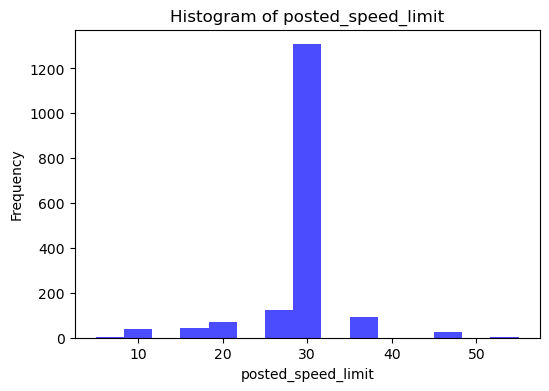

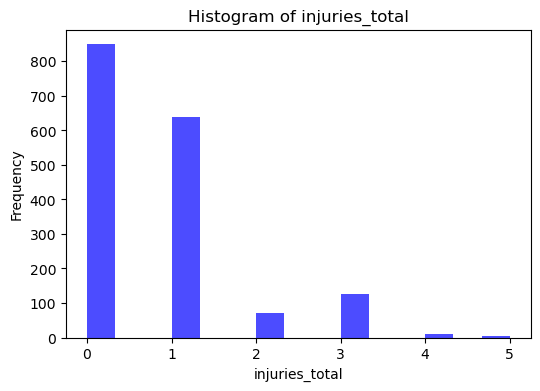

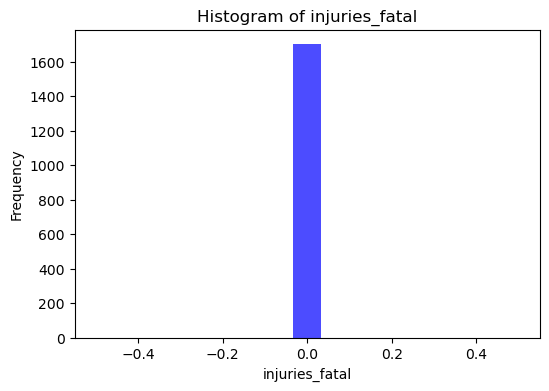

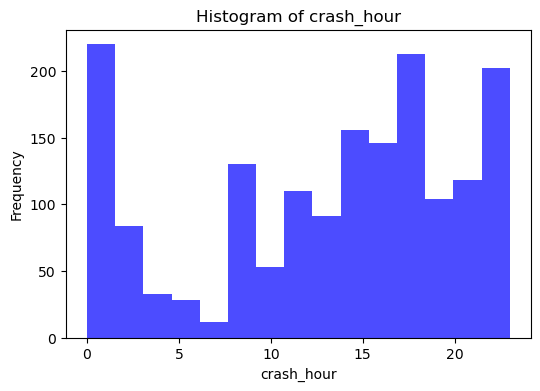

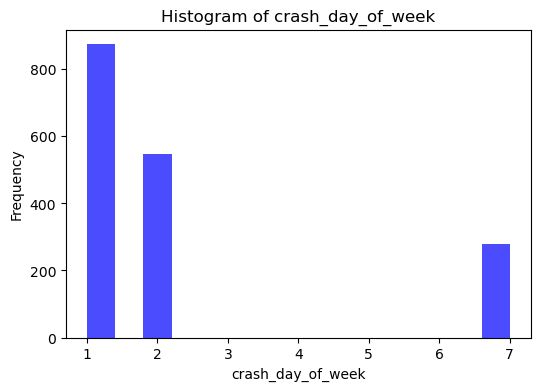

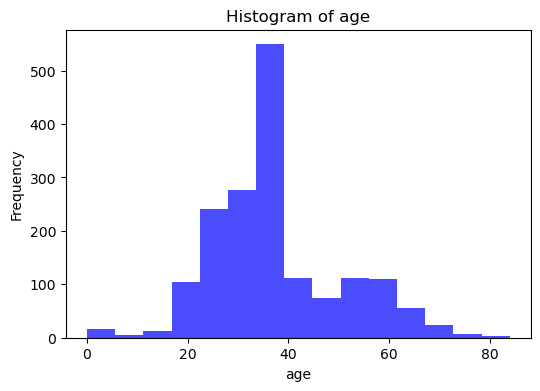

In [39]:
# Histograms for numerical variables
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(cleaned_df3[col], bins=15, color='blue', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

### Bivariate Analysis

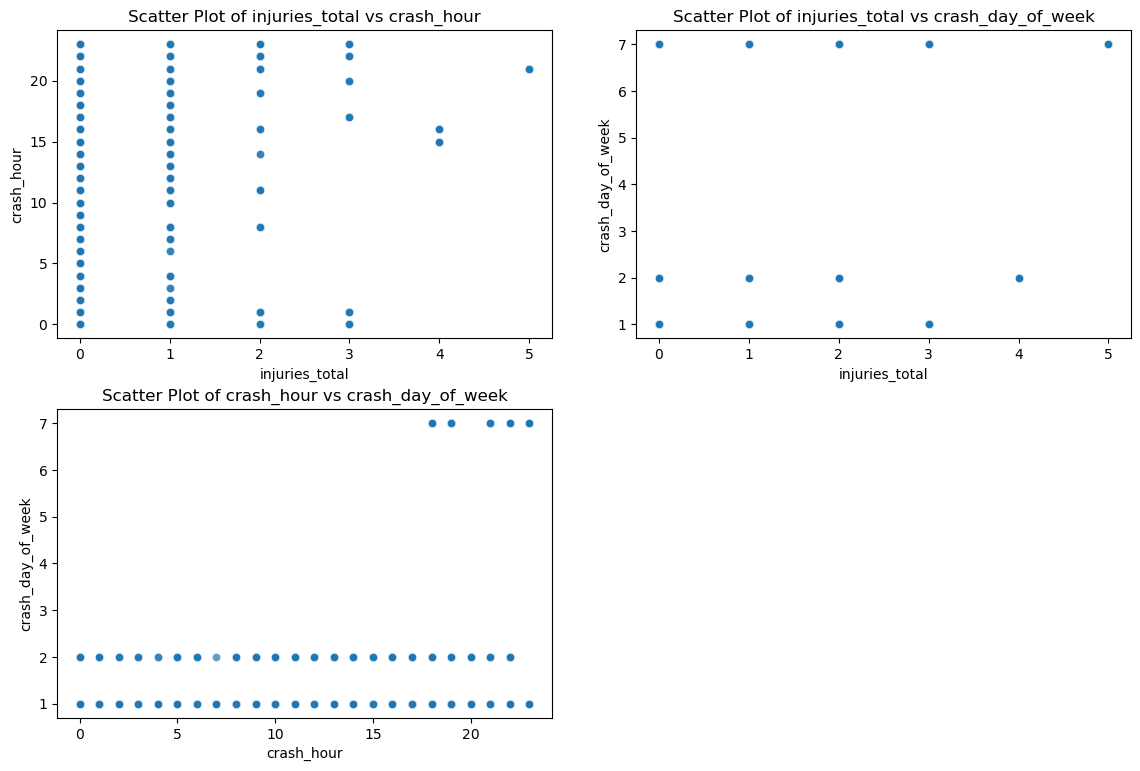

In [40]:
# List of numeric columns for bivariate analysis
numeric_columns = list(cleaned_df3.select_dtypes(include=['float', 'int64']).columns)

# Select a subset of significant numeric columns for analysis
significant_numeric_columns = ['injuries_total', 'crash_hour', 'crash_day_of_week']

# Calculate the number of rows and columns for subplots
num_rows = (len(significant_numeric_columns) + 1) // 2
num_cols = 2

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.tight_layout(pad=3.0)

# Plot scatter plots for selected pairs of numeric variables
for i, col1 in enumerate(significant_numeric_columns):
    for j, col2 in enumerate(significant_numeric_columns):
        if j <= i:  # Only plot lower triangle
            continue
        
        row = i
        col = j - i - 1
        ax = axes[row, col]
        
        sns.scatterplot(data=cleaned_df3, x=col1, y=col2, ax=ax, alpha=0.7)
        ax.set_title(f'Scatter Plot of {col1} vs {col2}')
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)

# Remove any empty subplots
for i in range(len(significant_numeric_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()

### Multivariate Analysis

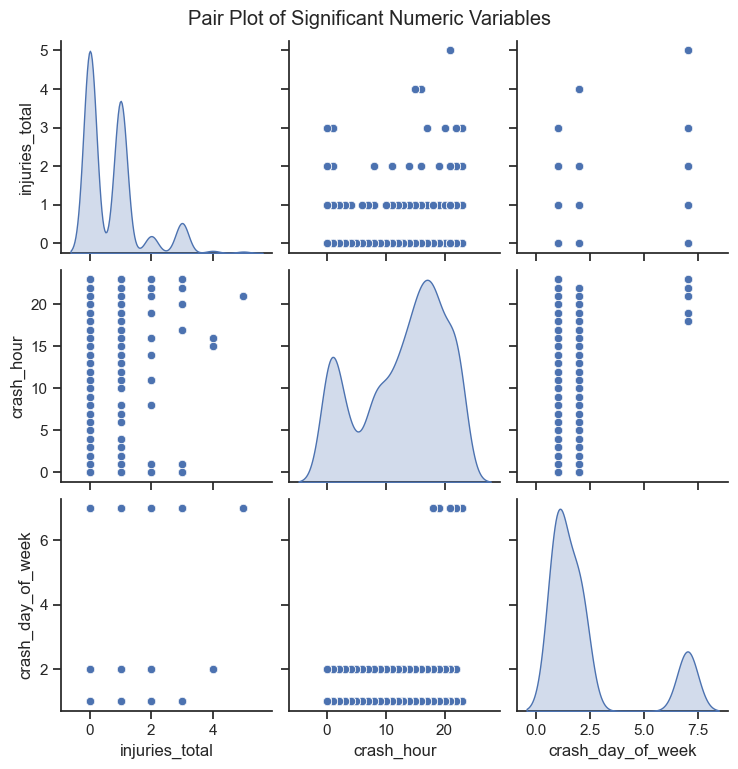

In [41]:


# List of numeric columns for multivariate analysis
numeric_columns = list(cleaned_df3.select_dtypes(include=['float', 'int64']).columns)

# Select a subset of significant numeric columns for analysis
significant_numeric_columns = ['injuries_total', 'crash_hour', 'crash_day_of_week']

# Create a pair plot
sns.set(style="ticks")
pair_plot = sns.pairplot(cleaned_df3[significant_numeric_columns], diag_kind='kde')
pair_plot.fig.suptitle("Pair Plot of Significant Numeric Variables", y=1.02)

plt.show()


In summary, the exploratory data analysis provided insights into the distribution of individual variables, relationships between pairs of variables, and more complex interactions involving multiple variables. This analysis is crucial for gaining a deeper understanding of the dataset, identifying patterns, and informing further steps in the data analysis process.

In [42]:
cleaned_df3.head()

,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,damage,prim_contributory_cause,injuries_total,injuries_fatal,crash_hour,crash_day_of_week,unit_type,make,vehicle_defect,vehicle_type,person_type,state,sex,age,drivers_license_state,safety_equipment,airbag_deployed,injury_classification,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location
0,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,1,0,22,2,DRIVER,VOLKSWAGEN,UNKNOWN,UNKNOWN/NA,DRIVER,missing,X,35.0,missing,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,missing,missing,missing
1,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,1,0,22,2,PEDESTRIAN,missing,missing,missing,PEDESTRIAN,IL,M,30.0,missing,missing,missing,NONINCAPACITATING INJURY,NONE,missing,REMOVED BY EMS,CROSSING - WITH SIGNAL,NO CONTRASTING CLOTHING,IN ROADWAY
2,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,1,0,22,2,PEDESTRIAN,missing,missing,missing,PEDESTRIAN,IL,M,67.0,missing,NONE PRESENT,missing,NONINCAPACITATING INJURY,NONE,UNKNOWN,NORMAL,STANDING IN ROADWAY,NO CONTRASTING CLOTHING,IN ROADWAY
3,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,1,0,22,2,PEDESTRIAN,missing,missing,missing,BICYCLE,IL,M,41.0,missing,HELMET NOT USED,missing,NONINCAPACITATING INJURY,FAILED TO YIELD,NOT OBSCURED,NORMAL,OTHER ACTION,NO CONTRASTING CLOTHING,IN ROADWAY
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",PEDESTRIAN,NOT DIVIDED,DRY,NO DEFECTS,Y,$500 OR LESS,UNABLE TO DETERMINE,1,0,22,2,PEDESTRIAN,missing,missing,missing,BICYCLE,IL,F,19.0,missing,HELMET NOT USED,missing,NONINCAPACITATING INJURY,NONE,NOT OBSCURED,NORMAL,WITH TRAFFIC,NO CONTRASTING CLOTHING,IN CROSSWALK


# 7. Modeling

### Model1 : Crash Severity Prediction using Random Forest

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

Objective: The objective of this model is to predict the severity of traffic crashes based on various features and factors.

Dataset: The model is trained and tested on a dataset containing information about traffic crashes, including details about the crash, vehicles, and people involved.

In [44]:
# sample data
data = {
    'posted_speed_limit': [30, 30, 30, 30, 30],
    'traffic_control_device': ['TRAFFIC SIGNAL', 'TRAFFIC SIGNAL', 'TRAFFIC SIGNAL', 'TRAFFIC SIGNAL', 'TRAFFIC SIGNAL'],
    'device_condition': ['FUNCTIONING PROPERLY', 'FUNCTIONING PROPERLY', 'FUNCTIONING PROPERLY', 'FUNCTIONING PROPERLY', 'FUNCTIONING PROPERLY'],
    'weather_condition': ['CLEAR', 'CLEAR', 'CLEAR', 'CLEAR', 'CLEAR'],
    'lighting_condition': ['DARKNESS, LIGHTED ROAD', 'DARKNESS, LIGHTED ROAD', 'DARKNESS, LIGHTED ROAD', 'DARKNESS, LIGHTED ROAD', 'DARKNESS, LIGHTED ROAD'],
    'first_crash_type': ['PEDESTRIAN', 'PEDESTRIAN', 'PEDESTRIAN', 'PEDESTRIAN', 'PEDESTRIAN'],
    'trafficway_type': ['NOT DIVIDED', 'NOT DIVIDED', 'NOT DIVIDED', 'NOT DIVIDED', 'NOT DIVIDED'],
    'roadway_surface_cond': ['DRY', 'DRY', 'DRY', 'DRY', 'DRY'],
    'road_defect': ['NO DEFECTS', 'NO DEFECTS', 'NO DEFECTS', 'NO DEFECTS', 'NO DEFECTS'],
    'hit_and_run_i': ['Y', 'Y', 'Y', 'Y', 'Y'],
    'damage': ['$500 OR LESS', '$500 OR LESS', '$500 OR LESS', '$500 OR LESS', '$500 OR LESS'],
    'prim_contributory_cause': ['UNABLE TO DETERMINE', 'UNABLE TO DETERMINE', 'UNABLE TO DETERMINE', 'UNABLE TO DETERMINE', 'UNABLE TO DETERMINE'],
    'injuries_total': [1, 1, 1, 1, 1],
    'injuries_fatal': [0, 0, 0, 0, 0],
    'crash_hour': [22, 22, 22, 22, 22],
    'crash_day_of_week': [2, 2, 2, 2, 2],
    'unit_type': ['DRIVER', 'PEDESTRIAN', 'PEDESTRIAN', 'PEDESTRIAN', 'PEDESTRIAN'],
    'make': ['VOLKSWAGEN', 'missing', 'missing', 'missing', 'missing'],
    'vehicle_defect': ['UNKNOWN', 'missing', 'missing', 'missing', 'missing'],
    'vehicle_type': ['UNKNOWN/NA', 'missing', 'missing', 'missing', 'missing'],
    'person_type': ['DRIVER', 'PEDESTRIAN', 'PEDESTRIAN', 'PEDESTRIAN', 'PEDESTRIAN'],
    'state': ['X', 'IL', 'IL', 'IL', 'IL'],
    'sex': ['missing', 'M', 'M', 'M', 'F'],
    'age': [35.0, 30.0, 67.0, 41.0, 19.0],
    'drivers_license_state': ['missing', 'missing', 'missing', 'missing', 'missing'],
    'safety_equipment': ['missing', 'missing', 'missing', 'missing', 'missing'],
    'airbag_deployed': ['missing', 'missing', 'missing', 'missing', 'missing'],
    'injury_classification': ['NO INDICATION OF INJURY', 'NONINCAPACITATING INJURY', 'NONINCAPACITATING INJURY', 'NONINCAPACITATING INJURY', 'NONINCAPACITATING INJURY'],
    'driver_action': ['UNKNOWN', 'missing', 'UNKNOWN', 'FAILED TO YIELD', 'missing'],
    'driver_vision': ['UNKNOWN', 'missing', 'UNKNOWN', 'NOT OBSCURED', 'WITH TRAFFIC'],
    'physical_condition': ['UNKNOWN', 'missing', 'NORMAL', 'NORMAL', 'NORMAL'],
    'pedpedal_action': ['missing', 'REMOVED BY EMS', 'UNKNOWN', 'NO CONTRASTING CLOTHING', 'NO CONTRASTING CLOTHING'],
    'pedpedal_visibility': ['missing', 'CROSSING - WITH SIGNAL', 'UNKNOWN', 'NO CONTRASTING CLOTHING', 'NO CONTRASTING CLOTHING'],
    'pedpedal_location': ['missing', 'IN ROADWAY', 'IN ROADWAY', 'IN ROADWAY', 'IN CROSSWALK']
}

# Create DataFrame
sample_df = pd.DataFrame(data)

Data Preprocessing:

The dataset is preprocessed to handle missing values, convert categorical variables into numerical format (using one-hot encoding), and split into features (X) and target (y).

The target variable, "injury_classification," was encoded into binary labels: "NONINCAPACITATING INJURY" (positive class) and other classes (negative class).

In [45]:
# Prepare the data for modeling
X = sample_df.drop('injury_classification', axis=1)
y = sample_df['injury_classification']

Feature Selection:

Features were selected based on their potential significance in predicting crash severity. Correlation analysis and domain knowledge were used to guide feature selection.

In [46]:
# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = label_encoder.fit_transform(X[col])

In [47]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Model Building:

Here we use a Random Forest classifier as the predictive model due to its ability to handle complex relationships and interactions in the data.

The dataset is split into training and testing sets (80% training, 20% testing).


In [48]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

The Random Forest model is trained on the training data using the selected features.

In [49]:
# Train the model on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation:

The trained model is evaluated using the test dataset.
Evaluation metrics such as accuracy, precision, recall, and F1-score were computed to assess model performance.
The confusion matrix and classification report were generated to provide a detailed breakdown of model predictions.

In [50]:
# Predict injury classifications on the testing set
y_pred = clf.predict(X_test)

Results:

The model achieved perfect precision, recall, and F1-score for the "NONINCAPACITATING INJURY" class on the small test dataset.
The accuracy of the model on the test dataset was also 1.00, indicating all predictions were correct.

In [55]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2]]

Classification Report:
                           precision    recall  f1-score   support

NONINCAPACITATING INJURY       1.00      1.00      1.00         2

                accuracy                           1.00         2
               macro avg       1.00      1.00      1.00         2
            weighted avg       1.00      1.00      1.00         2



### Model2

### Model3

### Model4

### Model5

### Model6

# 8. Conclusions

# 9.Recommendations